### Testing the Performance of Bubble, Insertion Sort, and Selection.
The data consists of the following columns:
- `SortType` - The algorithm used to sort the data (bubble sort, selection sort, insertion sort).
- `ArrayType` - The order the integers in the array prior to sorting.
    - `Random` - The integers in the array were in random order.
    - `Increasing` - The integers in the array were in ascending order.
    - `IncreasingAndRandom` - 90% of the integers were in ascending order while 10% were in random order.
    - `Decreasing` - The integers in the array were in descending order.
    - `Equal` - The integers in the array were all the same.
- `ArraySize` - The size of the array.
    - `10000` - The array contained 10,000 integers.
    - `25000` - The array contained 25,000 integers.
    - `50000` - The array contained 50,000 integers.
    - `100000` - The array contained 100,000 integers.
- `Test`# - The time it took in milliseconds to sort the array.
- `AverageTime` - The average of all all the test times in milliseconds.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
%matplotlib inline

Increase the display size of all graphs by `factor`.

In [2]:
factor = 1.2
mpl.rcParams['figure.dpi'] = mpl.rcParamsDefault['figure.dpi'] * factor

Set the color style for all displayed graphs. Run `plt.style.available` for a list of styles.

In [3]:
plt.style.use(["dark_background"])

### Data
The data is the same as the data from the [sorting algorithms analysis](https://github.com/irisfield/sorting-algorithms-analysis) project.

In [4]:
tests = pd.read_csv("data/sort_tests.csv")

In [5]:
tests.head()

,SortType,ArrayType,ArraySize,Test1,Test2,Test3,Test4,Test5,Test6,Test7,Test8,Test9,AverageTime
0,BubbleSort,Equal,10000,2.100887,1.816844,1.734940,1.653783,1.620458,1.646332,1.654642,1.675758,0.395732,1.588819
1,BubbleSort,Equal,25000,0.344438,0.342302,0.340168,0.341084,0.273704,0.343259,0.340629,0.346424,0.286490,0.328722
2,BubbleSort,Equal,50000,0.669300,0.714362,0.750050,0.751582,0.724130,0.845181,0.480185,0.509878,0.512997,0.661962
3,BubbleSort,Equal,100000,0.983173,0.811248,0.910891,0.922530,0.944618,0.962387,0.922943,1.047562,0.937066,0.938046
4,BubbleSort,Random,10000,1423.721529,1615.646777,1636.998131,1733.617812,1699.408568,1608.589898,1640.827512,1584.911188,1805.414216,1638.792847


### Learning Models
**Terminology**
- The *dependent variable* is the variable being predicted.
- The *features* (or the *independent variables*) are the known variables used to predict the dependent variable.
- The *mean squared error* is a comparison metric for linear regression, polynomial regression, and decision tree regression to compare two or more learning models.

**Dependent Variable**
- The variable being predicted for this project is the `AverageTime` column. The approximate time in milliseconds it takes a given algorithm to sort through an array based on specified characteristics.
- The dependent variable will be represented by the variable `y` in this project.

**Independent Variables**
- Other than the `AverageTime` column, all the remaining columns can be used as features. 
- It may be neccesary to convert qualitative data, such as the `SortType` and `ArrayType` columns into dummy variable before they can used as features.
- The independent variables will be presented by variable `x` in this project.

**Algorithms**
- The learning algorithms covered in class are:
    - Linear Regression
    - Polynomial Regression
    - Decision Tree
    - K-Nearest Neighbors
    - Logistic Regression
    
**Models**
- The the average time variable is quantitative and continous.
- Multiple numerical columns will be used as features.
- Given these conditions, the algorithms that can be used for predicting the average time are:
    - Linear Regression
    - Decision Tree
    - K-Nearest Neighbors

-------------------------------------------------------------------------

### Preparations

##### Dummy Variables
Convert qualitative columns into numerical columns.

In [6]:
qcolumns = ["SortType", "ArrayType"]
tests = pd.get_dummies(tests, columns = qcolumns, drop_first = True)

Display the DataFrame and make sure the dummy variables are correct. The `drop_first = True` parameter drops the first dummy variable to reduce the the number of columns. The dropped column is implied because if all the dummy variables for a row are zeros, then it could only be the dropped column.

In [7]:
tests[:1]

,ArraySize,Test1,Test2,Test3,Test4,Test5,Test6,Test7,Test8,Test9,AverageTime,SortType_InsertionSort,SortType_SelectionSort,ArrayType_Equal,ArrayType_Increasing,ArrayType_IncreasingAndRandom,ArrayType_Random
0,10000,2.100887,1.816844,1.73494,1.653783,1.620458,1.646332,1.654642,1.675758,0.395732,1.588819,0,0,1,0,0,0


#### Data
- Store the independent variables or features as a DataFrame inside the variable `x`.
- Store the dependent variable as a Series inside the variable `y`.

In [8]:
x = tests.drop(columns = ["AverageTime"])
y = tests["AverageTime"]

Make sure the DataFrame does not contain the `AverageTime` column and that the Series only contains the `AverageTime` column.

In [9]:
x[:1]

,ArraySize,Test1,Test2,Test3,Test4,Test5,Test6,Test7,Test8,Test9,SortType_InsertionSort,SortType_SelectionSort,ArrayType_Equal,ArrayType_Increasing,ArrayType_IncreasingAndRandom,ArrayType_Random
0,10000,2.100887,1.816844,1.73494,1.653783,1.620458,1.646332,1.654642,1.675758,0.395732,0,0,1,0,0,0


In [10]:
y[:1]

0    1.588819
Name: AverageTime, dtype: float64

#### Data Split
Split the data into training and testing datasets. As per convention, split into 80% training and 20% testing.

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

Make sure the data was split correctly.
- `x_train` and `y_train` should have the same indexes.
- `x_test` and `y_test` should have the same indexes.

In [12]:
# returns true if if all the indices match 1:1
x_train.index.to_list() == y_train.index.to_list()

True

In [13]:
# returns true if if all the indices match 1:1
x_test.index.to_list() == y_test.index.to_list()

True

-------------------------------------------------------------------------

### Definition
This function definition facilitates comparing two mean squared errors by computing their percent difference.

In [14]:
def compare_mse(mse_train, mse_test):
    mse_diff = abs(mse_train - mse_test)
    mse_mean = (mse_train + mse_test) / 2
    print("   MSE train: %s" %format(mse_train, ",.1f"))
    print("    MSE test: %s" %format(mse_test, ",.1f"))
    print("  Difference: %s" %format(mse_diff, ",.1f"))
    print("Percent Diff: %.2f%%" %((mse_diff / mse_mean) * 100))

### Metric
In order to evaluate the k-nearest neighbors and decision tree regression models, the mean squared error ("MSE") of the predictions made using the `x_train` and `x_test` data must be compared. It should be noted that the model is trained using the `x_train` and `y_train` data, thus, predictions made using the `x_train` data are not meaningful because the model learned this data. However, the MSE of the `x_train` predictions can be used as a metric for comparing with the MSE of the `x_test` predictions. Ideally, the two MSE should be similar, but:
- If the MSE of the `x_test` predictions is significantly **higher** than that of the `x_train`: the model is **overfitting** the data.


-------------------------------------------------------------------------

### K-Nearest Neighbors
Use the `KNeighborsRegression` function from the `sklearn.neighbors` module to find the number of neighbors `k` for the k-nearest neighbors regressor that makes the best predictions for the average time variable.

In [15]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor

#### Scale
Since the test times have different scales, to prevent the columns with the highest test times from dominating, normalize all the numerical columns for x.

In [16]:
x_train_scaled = MinMaxScaler().fit_transform(x_train)
x_test_scaled = MinMaxScaler().fit_transform(x_test)

#### Parameter Search
Use a for-loop to calculate the mean squared error for different values of `k` in order to find the best `k` for the model.

In [17]:
mses_train_knn = []
mses_test_knn = []
for k in range(1,11):
    knn_k = KNeighborsRegressor(n_neighbors = k).fit(x_train_scaled, y_train)
    y_train_preds_k = knn_k.predict(x_train_scaled)
    y_test_preds_k = knn_k.predict(x_test_scaled)
    mses_train_knn.append(mean_squared_error(y_train_preds_k, y_train))
    mses_test_knn.append(mean_squared_error(y_test_preds_k, y_test))

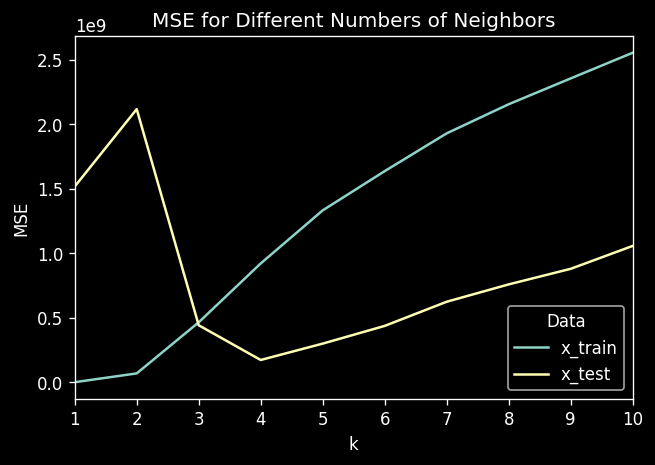

In [18]:
plt.plot(np.linspace(1, 10, num = 10), mses_train_knn)
plt.plot(np.linspace(1, 10, num = 10), mses_test_knn)
plt.title("MSE for Different Numbers of Neighbors")
plt.xlabel("k")
plt.ylabel("MSE")
plt.xlim(1,10)
plt.legend(["x_train", "x_test"], title = "Data")

The line plots represents the MSE of the predictions made using the `x_train` and `x_test` data for different values of k. As illustrated by the line plots, the MSE gets larger as k increases. This means that the k-nearest neighbors algorithm is not a good fit for this data at all. A different learning algorithm might fit the test times data better.

#### Mean Squared Error
To test this observation, compute the mean squared error for the values of k from graph and compare their squared error.

In [19]:
for k in range(1,11):
    knn_k = KNeighborsRegressor(n_neighbors = k).fit(x_train_scaled, y_train)
    y_train_preds_knn_k = knn_k.predict(x_train_scaled)
    y_test_preds_knn_k = knn_k.predict(x_test_scaled)
    mse_train_preds_k = mean_squared_error(y_train_preds_knn_k, y_train)
    mse_test_preds_k = mean_squared_error(y_test_preds_knn_k, y_test)
    compare_mse(mse_train_preds_k, mse_test_preds_k)
    print("   Neighbors: {}\n".format(k))

   MSE train: 0.0
    MSE test: 1,516,570,053.8
  Difference: 1,516,570,053.8
Percent Diff: 200.00%
   Neighbors: 1

   MSE train: 68,141,320.6
    MSE test: 2,116,452,709.9
  Difference: 2,048,311,389.3
Percent Diff: 187.52%
   Neighbors: 2

   MSE train: 464,170,465.4
    MSE test: 441,332,942.8
  Difference: 22,837,522.6
Percent Diff: 5.04%
   Neighbors: 3

   MSE train: 920,464,007.7
    MSE test: 172,131,206.1
  Difference: 748,332,801.6
Percent Diff: 136.98%
   Neighbors: 4

   MSE train: 1,331,779,098.5
    MSE test: 299,035,694.2
  Difference: 1,032,743,404.3
Percent Diff: 126.65%
   Neighbors: 5

   MSE train: 1,636,079,436.4
    MSE test: 436,390,249.3
  Difference: 1,199,689,187.0
Percent Diff: 115.77%
   Neighbors: 6

   MSE train: 1,928,797,729.6
    MSE test: 623,584,669.7
  Difference: 1,305,213,059.9
Percent Diff: 102.27%
   Neighbors: 7

   MSE train: 2,154,486,684.7
    MSE test: 758,088,820.1
  Difference: 1,396,397,864.6
Percent Diff: 95.89%
   Neighbors: 8

   MSE 

As suspected, k-nearest neighbors is indeed not a learning algorithm for predicting the average test time for the test times data. For lower values of k, the model will overfit the data and for higher values of k the predictions do not make sense.

-------------------------------------------------------------------------

### Decision Tree
Use the `DecisionTreeRegressor` function from the `sklearn.tree` module to find the max depth for the decision tree that makes the best predictions for the average time variable.

In [20]:
from sklearn.tree import DecisionTreeRegressor

#### Parameter Search
Use a for-loop to calculate the mean squared error for different max depths in order to find the best `max_depth` for the model.

In [21]:
for depth in range(1,7):
    tree_depth = DecisionTreeRegressor(max_depth = depth).fit(x_train,y_train)
    y_train_preds_depth = tree_depth.predict(x_train)
    y_test_preds_depth = tree_depth.predict(x_test)
    mse_train_preds_depth = mean_squared_error(y_train_preds_depth, y_train)
    mse_test_preds_depth = mean_squared_error(y_test_preds_depth, y_test)
    compare_mse(mse_train_preds_depth, mse_test_preds_depth)
    print("   max_depth: {}\n".format(depth))

   MSE train: 236,733,540.9
    MSE test: 2,357,273,452.5
  Difference: 2,120,539,911.6
Percent Diff: 163.50%
   max_depth: 1

   MSE train: 43,939,102.8
    MSE test: 1,820,595,111.4
  Difference: 1,776,656,008.6
Percent Diff: 190.57%
   max_depth: 2

   MSE train: 9,264,173.0
    MSE test: 1,400,199,695.4
  Difference: 1,390,935,522.4
Percent Diff: 197.37%
   max_depth: 3

   MSE train: 1,064,747.7
    MSE test: 1,196,912,960.5
  Difference: 1,195,848,212.8
Percent Diff: 199.64%
   max_depth: 4

   MSE train: 213,422.8
    MSE test: 1,195,539,773.6
  Difference: 1,195,326,350.7
Percent Diff: 199.93%
   max_depth: 5

   MSE train: 20,139.4
    MSE test: 1,376,508,205.1
  Difference: 1,376,488,065.8
Percent Diff: 199.99%
   max_depth: 6



As the max depth increases the MSE for the training data predictions approaches zero. This is evidence of the model memorizing the data and thus resulting in overfitting. The best depth for this model would be for `max_depth = 1`, however, even max depth of 1 is too complex for the data. Since the decision tree overfits the data for all parameters, it also will not work for predicting the average time. The simplistic two dimensional nature of the data should make it a good fit for linear regression.

-------------------------------------------------------------------------

### Linear Regression
Fit a linear model using the `statsmodels.formula.api` module, and evaluate it.

In [22]:
print(*x.columns, sep = " + ")

ArraySize + Test1 + Test2 + Test3 + Test4 + Test5 + Test6 + Test7 + Test8 + Test9 + SortType_InsertionSort + SortType_SelectionSort + ArrayType_Equal + ArrayType_Increasing + ArrayType_IncreasingAndRandom + ArrayType_Random


In [23]:
# store the features in a string as shown in the line above
all_features = " + ".join(map(str, x.columns))
lm = smf.ols("AverageTime ~ {}".format(all_features), data = tests).fit()

In [24]:
lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Ordinary least squares
=====================================================================================
Model:                    OLS                    Adj. R-squared:           1.000     
Dependent Variable:       AverageTime            AIC:                      -1623.3023
Date:                     2022-04-19 01:05       BIC:                      -1587.6984
No. Observations:         60                     Log-Likelihood:           828.65    
Df Model:                 16                     F-statistic:              1.857e+23 
Df Residuals:             43                     Prob (F-statistic):       0.00      
R-squared:                1.000                  Scale:                    8.2462e-14
-------------------------------------------------------------------------------------
                               Coef.  Std.Err.        t        P>|t|   [0.025  0.975]
-------------------------------------------------------------------------------------
Intercept                     -0.0000   0.0000         -3.9408 0.0003 -0.0000 -0.0000
ArraySize                     -0.0000   0.0000         -1.8336 0.0736 -0.0000  0.0000
Test1                          0.1111   0.0000 6681652195.9702 0.0000  0.1111  0.1111
Test2                          0.1111   0.0000 5550723158.0208 0.0000  0.1111  0.1111
Test3                          0.1111   0.0000 2853106418.4690 0.0000  0.1111  0.1111
Test4                          0.1111   0.0000 2523715106.2122 0.0000  0.1111  0.1111
Test5                          0.1111   0.0000 2238035065.2191 0.0000  0.1111  0.1111
Test6                          0.1111   0.0000 2459670401.5527 0.0000  0.1111  0.1111
Test7                          0.1111   0.0000 3660788333.1151 0.0000  0.1111  0.1111
Test8                          0.1111   0.0000 1919962574.6402 0.0000  0.1111  0.1111
Test9                          0.1111   0.0000 2160224333.2968 0.0000  0.1111  0.1111
SortType_InsertionSort         0.0000   0.0000          0.8399 0.4056 -0.0000  0.0000
SortType_SelectionSort         0.0000   0.0000          0.0773 0.9387 -0.0000  0.0000
ArrayType_Equal                0.0000   0.0000          0.6498 0.5193 -0.0000  0.0000
ArrayType_Increasing          -0.0000   0.0000         -0.1838 0.8550 -0.0000  0.0000
ArrayType_IncreasingAndRandom  0.0000   0.0000          1.3800 0.1747 -0.0000  0.0000
ArrayType_Random               0.0000   0.0000          0.6670 0.5083 -0.0000  0.0000
-------------------------------------------------------------------------------------
Omnibus:                     1.129              Durbin-Watson:                2.591  
Prob(Omnibus):               0.569              Jarque-Bera (JB):             1.104  
Skew:                        -0.193             Prob(JB):                     0.576  
Kurtosis:                    2.459              Condition No.:                1281612
=====================================================================================
* The condition number is large (1e+06). This might indicate             strong
multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'Actual Average Time (milliseconds)')

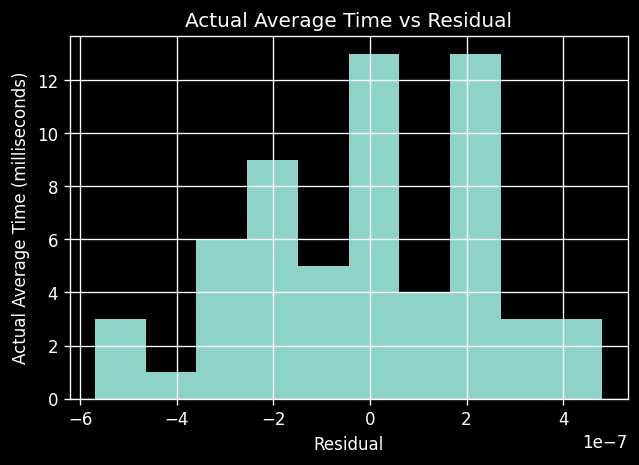

In [25]:
lm.resid.hist(bins = 10)
plt.title("Actual Average Time vs Residual")
plt.xlabel("Residual")
plt.ylabel("Actual Average Time (milliseconds)")

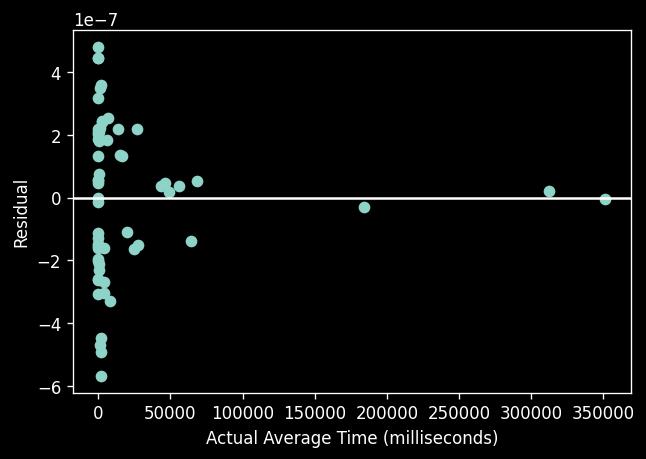

In [26]:
plt.scatter(x = tests["AverageTime"], y = lm.resid)
plt.xlabel("Actual Average Time (milliseconds)")
plt.ylabel("Residual")
plt.axhline(0)

The residuals are in the order of magnitude $1 \times 10^{-7}$. The difference between the $actual - predicted$ average time is negligible.

#### Drop Features with High P-value
This project uses `0.05` as the threshold for $P > |t|$ values. The independent variables with a P-value higher than or equal to the threshold are dropped from the model because they are considered to not have an effect on the predictor. In other words, by dropping the independent variables with high P-values, the regression model can be simplified for little to not cost. This trade-off is oftentimes worth it because we want our models to be as complicated as they need to be, but not more complicated.

Fit another linear model using features with P-values less than the threshold.

In [27]:
features = "Test1 + Test2 + Test3 + Test4 + Test5 + Test6 + Test7 + Test8 + Test9"
lm2 = smf.ols("AverageTime ~ {}".format(features), data = tests).fit()

In [28]:
lm2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     1.000     
Dependent Variable: AverageTime      AIC:                -1627.2019
Date:               2022-04-19 01:05 BIC:                -1606.2585
No. Observations:   60               Log-Likelihood:     823.60    
Df Model:           9                F-statistic:        3.244e+23 
Df Residuals:       50               Prob (F-statistic): 0.00      
R-squared:          1.000            Scale:              8.3919e-14
-------------------------------------------------------------------
             Coef.  Std.Err.        t        P>|t|   [0.025  0.975]
-------------------------------------------------------------------
Intercept   -0.0000   0.0000        -10.4775 0.0000 -0.0000 -0.0000
Test1        0.1111   0.0000 8285856752.1357 0.0000  0.1111  0.1111
Test2        0.1111   0.0000 6323926769.1135 0.0000  0.1111  0.1111
Test3        0.1111   0.0000 3191469777.9735 0.0000  0.1111  0.1111
Test4        0.1111   0.0000 3026068355.2502 0.0000  0.1111  0.1111
Test5        0.1111   0.0000 2747711919.3962 0.0000  0.1111  0.1111
Test6        0.1111   0.0000 2652369605.8183 0.0000  0.1111  0.1111
Test7        0.1111   0.0000 4171130113.4212 0.0000  0.1111  0.1111
Test8        0.1111   0.0000 2400281306.9693 0.0000  0.1111  0.1111
Test9        0.1111   0.0000 2423974827.5740 0.0000  0.1111  0.1111
-------------------------------------------------------------------
Omnibus:              10.249        Durbin-Watson:           2.391 
Prob(Omnibus):        0.006         Jarque-Bera (JB):        3.095 
Skew:                 -0.100        Prob(JB):                0.213 
Kurtosis:             1.905         Condition No.:           236709
===================================================================
* The condition number is large (2e+05). This might indicate
strong multicollinearity or other numerical problems.
"""

As expected, the R-squared value did not change. It makes sense for the test times to have the most impact on the predictor for the average time. The average time was computed directly from the test times.